In [1]:
%matplotlib widget
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
import warnings
warnings.filterwarnings("ignore")
from because.synth import gen_data
from because.probability.prob import ProbSpace
from because.visualization import viz
from because.synth import read_data
from because.visualization import cmodel
from because.causality import cdisc

In [1]:
# Veteran simulation binary-binary
sensitivity = 10
power = 10
MOD = ['A', 'B', 'C']
SEM = [
        'A = choice([0,1])',
        'C = choice([0,1,1,1])',
        #'B = 1 if (A == 0 and uniform(0,10) < 1) or (A == 1 and uniform(0,10) < 9) else 0'
        'P_B = (1-A) * .1 + A * .7 + (1-C) * .1 + C * .3',
        'B = binomial(1, P_B)'
        #'B = P_B + logistic(0,.3)'
      ]

gen = gen_data.Gen(sem=SEM, mod=MOD)
ds = gen.getDataset(100000)
#for i in range(100):
#    print(ds['A'][i], ds['B'][i])

ps = ProbSpace(ds, categorical=[])
cg = cdisc.discover(ps=ps, power=power, sensitivity=sensitivity, maxLevel=3, verbosity=4)
cmodel.show(cg=cg, edgeLabels='corr')
print('Model score =', cg.TestModel(order=3, power=power, sensitivity=sensitivity, testDirections=False, verbosity=4)[0])

NameError: name 'gen_data' is not defined

In [6]:
ps.getMidpoints('A')
ps.getCondSpecs(['A'], power)

[[('A', None, 0.0)], [('A', 0.0, None)]]

In [3]:
print(ps.dependence('A', 'C', sensitivity=10))
print(ps.dependence('A', 'C', ['B'], sensitivity=10, dMethod='d'))
print(ps.P(('B',1)))
print(ps.corrCoef('A', 'C'))
print(ps.dependence('A','C'))
ps2 = ps.SubSpace([('B', 0)])
print(ps2.corrCoef('A','C'))
print(ps2.dependence('A','C'))
ps2 = ps.SubSpace([('B', 1)])
print(ps2.corrCoef('A','C'))
print(ps2.dependence('A','C'))

7.426077829330395e-21
rv, testSpecs, power =  C [[('C', 0.0)], [('C', 1.0)]] 1
spec =  [('B', 0.0)] [('C', 0.0)] , givensB =  [] , dep =  1.0 , prob1.N, prob2.N =  34930 12379
ss1.parentQuery =  [('B', 0.0)] , ss2.parentQuery =  [('C', 0.0)]
spec =  [('B', 0.0)] [('C', 1.0)] , givensB =  [] , dep =  1.0 , prob1.N, prob2.N =  34930 22551
ss1.parentQuery =  [('B', 0.0)] , ss2.parentQuery =  [('C', 1.0)]
rv, testSpecs, power =  C [[('C', 0.0)], [('C', 1.0)]] 1
spec =  [('B', 1.0)] [('C', 0.0)] , givensB =  [] , dep =  1.0 , prob1.N, prob2.N =  65070 12566
ss1.parentQuery =  [('B', 1.0)] , ss2.parentQuery =  [('C', 0.0)]
spec =  [('B', 1.0)] [('C', 1.0)] , givensB =  [] , dep =  0.9999998389026568 , prob1.N, prob2.N =  65070 52504
ss1.parentQuery =  [('B', 1.0)] , ss2.parentQuery =  [('C', 1.0)]
0.9999999154174508
0.6507
-0.002186253988194228
1.3421394006507548e-05
-0.36726516667563036
0.9927253399760265
-0.0814749208132844
0.5352623321673157


Pass 1 of 4
    independence test:  ('A', 'B', []) = False
Pass 2 of 4
Pass 3 of 4
Pass 4 of 4
Detecting valid links.
      cdisc.discover: found path for ('A', 'B') = ['A', 'B']
cdisc.discover: pathvars for ('A', 'B') = []
N =  2000
s1, s2, preds =  [-0.51459465] 1 1
s1, s2, preds =  [-1.04030717] 1 1
s1, s2, preds =  [-0.2728038] 2 1
s1, s2, preds =  [-0.25096995] 1 1
s1, s2, preds =  [-0.75732625] 1 1
s1, s2, preds =  [1.10339527] 1 2
s1, s2, preds =  [0.04838824] 2 1
s1, s2, preds =  [0.13793916] 1 1
s1, s2, preds =  [1.27653374] 2 2
s1, s2, preds =  [0.20801178] 1 1
N =  2000
s1, s2, preds =  [1] -0.5145946521579491 0.09212108247219572
s1, s2, preds =  [1] -1.0403071661807355 0.09212108247219572
s1, s2, preds =  [2] -0.27280380422062395 0.5884952549797896
s1, s2, preds =  [1] -0.2509699503554031 0.09212108247219572
s1, s2, preds =  [1] -0.7573262489787949 0.09212108247219572
s1, s2, preds =  [1] 1.1033952732181087 0.09212108247219572
s1, s2, preds =  [2] 0.04838823982371859 0.5884

N =  2000
s1, s2, preds =  [1] 0.36708376870811055 0.02244173752971581
s1, s2, preds =  [1] 0.8277449883484717 0.02244173752971581
s1, s2, preds =  [1] -0.5015283760465646 0.02244173752971581
s1, s2, preds =  [1] -0.2692028245824526 0.02244173752971581
s1, s2, preds =  [1] 0.3831913717053502 0.02244173752971581
s1, s2, preds =  [1] 0.4871256162460018 0.02244173752971581
s1, s2, preds =  [1] -0.3160870446308533 0.02244173752971581
s1, s2, preds =  [2] -1.4838734257670514 0.8447679774040818
s1, s2, preds =  [1] -0.17178710493217023 0.02244173752971581
s1, s2, preds =  [1] 0.6054039695191109 0.02244173752971581
AtoB, BtoA =  4.457263584778545 3.264414845146224
N =  2000
s1, s2, preds =  [-0.69736295] 1 1
s1, s2, preds =  [-1.01516009] 2 1
s1, s2, preds =  [0.39962196] 1 1
s1, s2, preds =  [1.75460432] 2 2
s1, s2, preds =  [1.57368485] 2 2
s1, s2, preds =  [1.66176186] 2 2
s1, s2, preds =  [-1.02095604] 2 1
s1, s2, preds =  [-1.68751021] 1 1
s1, s2, preds =  [-0.40367014] 1 1
s1, s2, preds

N =  2000
s1, s2, preds =  [1] 0.34328385511174325 0.19555130414261138
s1, s2, preds =  [2] 0.22190065990254446 0.034793114180288374
s1, s2, preds =  [2] -0.06556989469951084 0.034793114180288374
s1, s2, preds =  [1] -0.2909083716758539 0.19555130414261138
s1, s2, preds =  [1] 0.6188977999372602 0.19555130414261138
s1, s2, preds =  [2] 1.105881719341229 0.034793114180288374
s1, s2, preds =  [1] 0.25669978747029976 0.19555130414261138
s1, s2, preds =  [2] -0.14047675842490254 0.034793114180288374
s1, s2, preds =  [2] 1.6751033724149456 0.034793114180288374
s1, s2, preds =  [2] -2.2916997209068364 0.034793114180288374
AtoB, BtoA =  1.7212536858821073 6.011982341452667
N =  2000
s1, s2, preds =  [-1.37925067] 1 1
s1, s2, preds =  [-1.57941095] 1 1
s1, s2, preds =  [-0.40470622] 2 1
s1, s2, preds =  [-0.47546705] 1 1
s1, s2, preds =  [0.30035264] 1 1
s1, s2, preds =  [0.09124684] 1 1
s1, s2, preds =  [1.11571175] 2 2
s1, s2, preds =  [0.06455802] 1 1
s1, s2, preds =  [-1.2696254] 1 1
s1, s

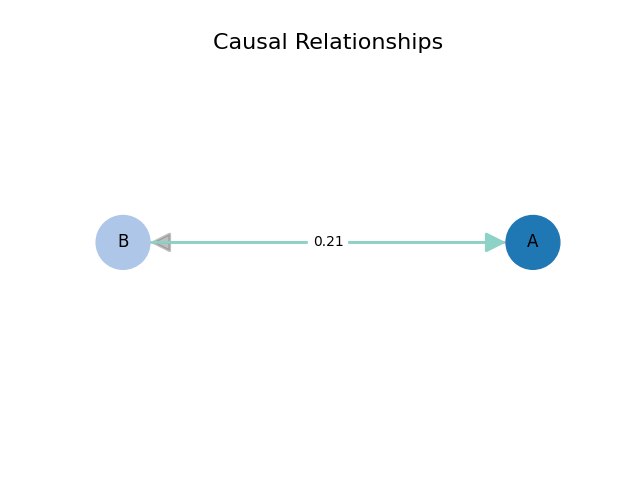

Model score = 1.0


In [2]:
# Veteran simulation
sensitivity = 10
power = 10
MOD = ['A', 'B']
SEM = [
        'A = logistic(55,10)',
        'B = 2 if (A >= 70 and uniform(0,10) < 8) else 2 if (A < 70 and uniform(0,10) < 1) else 1'
      ]

gen = gen_data.Gen(sem=SEM, mod=MOD)
ds = gen.getDataset(100000)


ps = ProbSpace(ds, categorical=['B'])
cg = cdisc.discover(ps=ps, power=power, sensitivity=sensitivity, maxLevel=3, verbosity=4)
cmodel.show(cg=cg, edgeLabels='mde')
print('Model score =', cg.TestModel(order=3, power=power, sensitivity=sensitivity, testDirections=False, verbosity=0)[0])

Viz.show: Target =  [('A',)] , Condition =  [('B',)]
Viz.show: Showing graph =  2-variable Probability Distribution plot. , power =  None
Controlling for:  [] , power =  None
Test Time =  0.359


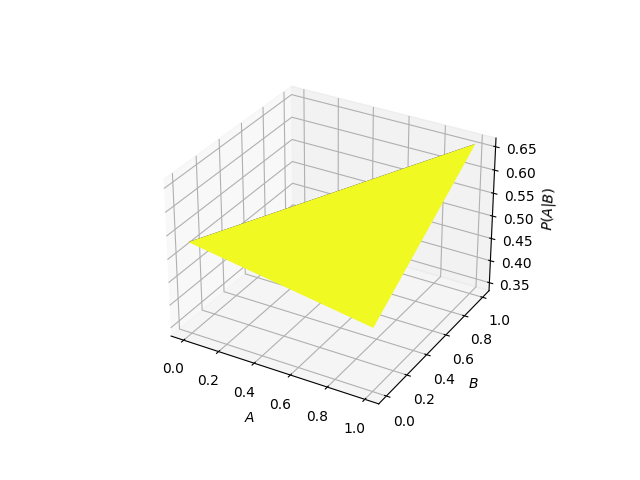

Viz.show: Target =  [('B',)] , Condition =  [('A',)]
Viz.show: Showing graph =  2-variable Probability Distribution plot. , power =  None
Controlling for:  [] , power =  None
Test Time =  0.364


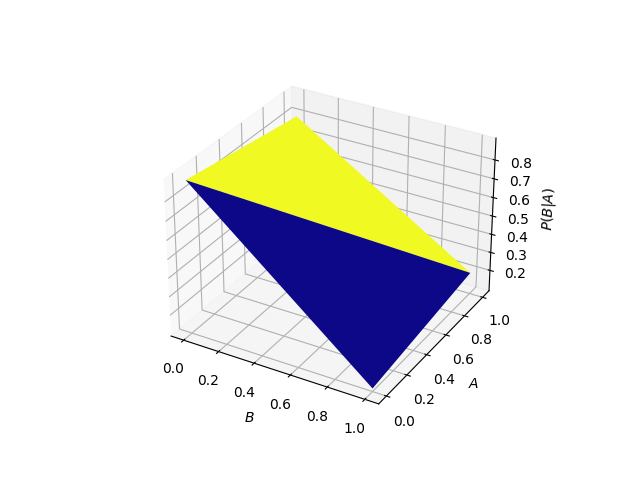

Viz.show: Target =  [('A', 2)] , Condition =  [('B',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.187


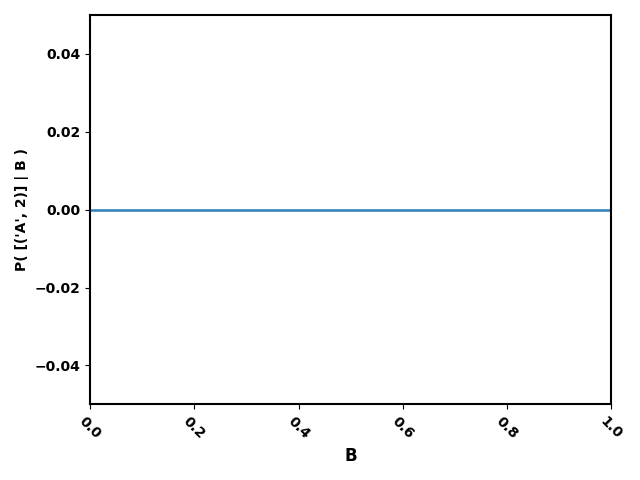

Viz.show: Target =  [('B', 2)] , Condition =  [('A',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.201


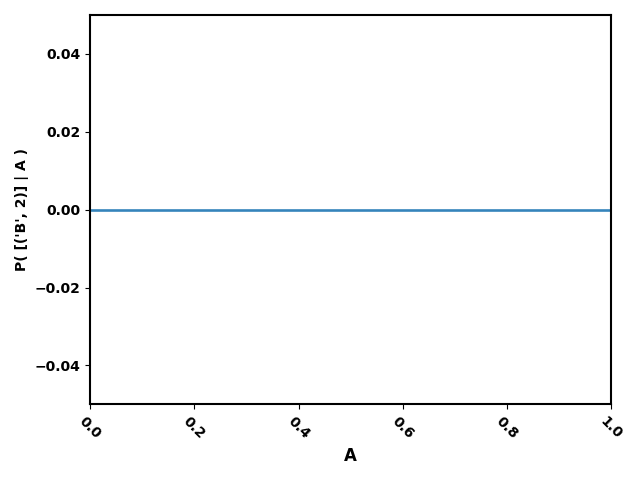

Viz.show: Target =  [('A',)] , Condition =  [('B',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  30
Elapsed Time =  0.276


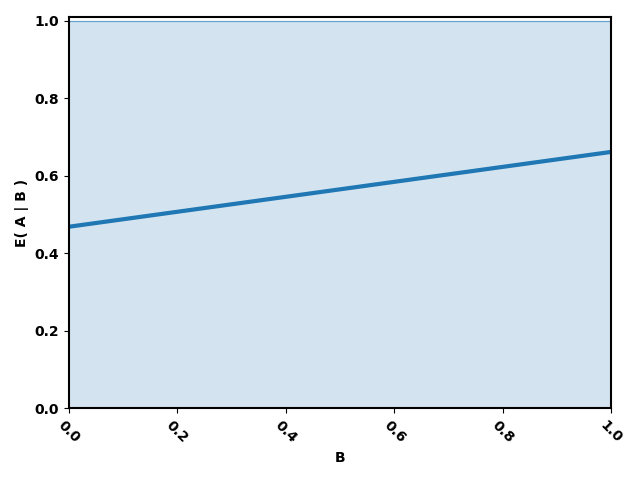

Viz.show: Target =  [('B',)] , Condition =  [('A',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  30
Elapsed Time =  0.237


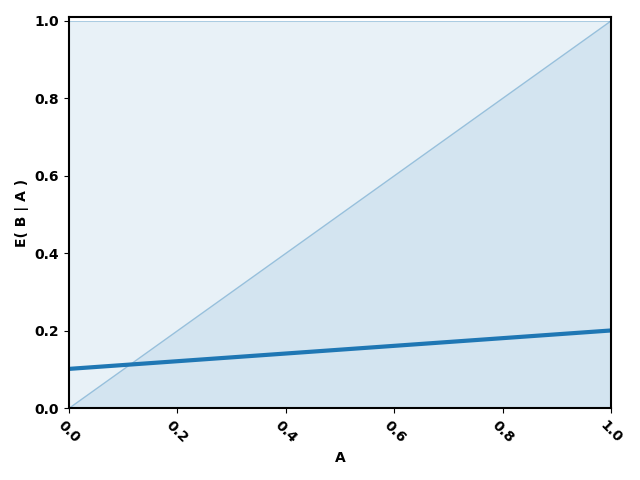

In [26]:
viz.show(probspace=ps, targetSpec=['A'],
         condSpec=['B'], filtSpec=[], gtype='pdf')
viz.show(probspace=ps, targetSpec=['B'],
         condSpec=['A'], filtSpec=[], gtype='pdf')
viz.show(probspace=ps, targetSpec=[('A',2)],
         condSpec=['B'], filtSpec=[], gtype='pdf')
viz.show(probspace=ps, targetSpec=[('B',2)],
         condSpec=['A'], filtSpec=[], gtype='pdf')
viz.show(probspace=ps, targetSpec=[('A')],
         condSpec=['B'], filtSpec=[], gtype='exp')
viz.show(probspace=ps, targetSpec=[('B')],
         condSpec=['A'], filtSpec=[], gtype='exp')

In [4]:
print(ps.isCategorical('A'), ps.isCategorical('B'))
print(ps.isDiscrete('A'), ps.isDiscrete('B'))
print(ps.discSpecs)
print(ps.getMidpoints('A'))
print(ps.cardinality('B'))

False True
False True
[(316, -77.88077423000047, 173.4984861686682, array([-7.78807742e+01, -7.70852702e+01, -7.62897663e+01, -7.54942623e+01,
       -7.46987583e+01, -7.39032543e+01, -7.31077503e+01, -7.23122463e+01,
       -7.15167423e+01, -7.07212383e+01, -6.99257343e+01, -6.91302304e+01,
       -6.83347264e+01, -6.75392224e+01, -6.67437184e+01, -6.59482144e+01,
       -6.51527104e+01, -6.43572064e+01, -6.35617024e+01, -6.27661984e+01,
       -6.19706945e+01, -6.11751905e+01, -6.03796865e+01, -5.95841825e+01,
       -5.87886785e+01, -5.79931745e+01, -5.71976705e+01, -5.64021665e+01,
       -5.56066625e+01, -5.48111586e+01, -5.40156546e+01, -5.32201506e+01,
       -5.24246466e+01, -5.16291426e+01, -5.08336386e+01, -5.00381346e+01,
       -4.92426306e+01, -4.84471267e+01, -4.76516227e+01, -4.68561187e+01,
       -4.60606147e+01, -4.52651107e+01, -4.44696067e+01, -4.36741027e+01,
       -4.28785987e+01, -4.20830947e+01, -4.12875908e+01, -4.04920868e+01,
       -3.96965828e+01, -3.89010

In [70]:
from math import log
from operator import itemgetter
def pred(p):
    return round(p,0)
avals = [0,1]
bvals = avals
cum_l = 0.0
cum_r = 0.0
for a in avals:
    for b in bvals:
        print(a, b, ps.P(('B',b), ('A', a)), ps.P(('A', a), ('B', b)), ps.P(('A', a)), ps.P(('B', b)))
dsa = ps.ds['A'][:]
dsb = ps.ds['B'][:]
z1 = zip(dsb, dsa)
z1s = sorted(z1, key=itemgetter(0))
#print(z1s[:1000])
u1, dsas = map(list,zip(*z1s))
#print(dsas[:100])
z2 = zip(dsa, dsb)
z2s = sorted(z2, key=itemgetter(0))
u2, dsbs = map(list, zip(*z2s))

for i in range(ps.N-1):
    l = abs(dsbs[i+1] - dsbs[i])
    cum_l += l
    r = abs(dsas[i+1] - dsas[i])
    cum_r += r

print('l, r = ', cum_l, cum_r)
    

0 0 0.9008733170036661 0.7510519097876828 0.249852 0.299693
0 1 0.09912668299633383 0.03536591809020901 0.249852 0.700307
1 0 0.09945770701248287 0.24894809021231726 0.750148 0.299693
1 1 0.9005422929875171 0.9646340819097909 0.750148 0.700307
l, r =  178976.0 159659.0


In [33]:
from because.visualization import grid
gr = grid.Grid(ps, ['A', 'B'])
g = gr.makeGrid()
for v in g:
    print(v)
from because.visualization import grid2
gr = grid2.Grid(ps, ['A', 'B'])
g = gr.makeGrid()
for v in g:
    print(v)

(0.0, 0.0)
(0.0, 1.0)
(1.0, 0.0)
(1.0, 1.0)
((0.0, 0.0), (0.0, 0.0))
((0.0, 0.0), (1.0, 1.0))
((1.0, 1.0), (0.0, 0.0))
((1.0, 1.0), (1.0, 1.0))


Pass 1 of 4
Pass 2 of 4
Pass 3 of 4
Pass 4 of 4
Detecting valid links.
N =  2000
s1, s2, A =  [-0.79052511] 1.8708207934142727 0.25353741784878625
s1, s2, A =  [-1.55862956] -1.502146416161782 -0.5507900188335798
s1, s2, A =  [-0.17827271] 0.31420457023659776 -0.3416899386081755
s1, s2, A =  [-0.33708424] -0.8831144042703918 0.11571922366188984
s1, s2, A =  [-0.21899504] -0.6623552983380022 -0.264580424705582
s1, s2, A =  [-0.1643231] -0.8716030123425483 -0.49585160491872526
s1, s2, A =  [0.42278605] -1.7958610272172002 0.3049499046382784
s1, s2, A =  [1.04223183] 0.09339246686552458 0.5746803909115228
s1, s2, A =  [-0.92708569] 0.8157611629901732 -0.19644149921982762
s1, s2, A =  [0.33225372] 1.8030933543831906 0.680735346908723
N =  2000
s1, s2, A =  [1.87082079] -0.7905251065300697 0.5293994642027362
s1, s2, A =  [-1.50214642] -1.558629557610549 -0.36766942989558704
s1, s2, A =  [0.31420457] -0.17827270862444577 -0.6440888356270372
s1, s2, A =  [-0.8831144] -0.3370842421746147 -0.26

s1, s2, A =  [-0.36864013] 0.7398109048393993 -0.06204979548643787
s1, s2, A =  [1.72504833] 0.9069166703639716 0.5310016890702987
s1, s2, A =  [-0.81691871] -1.186617019407363 -0.5068742864009886
s1, s2, A =  [0.18462184] -0.586430012162174 -0.2527070003236893
N =  2000
s1, s2, A =  [0.61825958] 0.4895192661280655 0.1897349229471234
s1, s2, A =  [0.98777051] 1.1667461588383816 0.044532354197050025
s1, s2, A =  [-0.42855245] -0.014237883377685043 0.39381565724778883
s1, s2, A =  [1.02377806] 0.12783975420297264 1.1013981136811073
s1, s2, A =  [-2.47407273] -0.1390415628349383 -0.8209474880872332
s1, s2, A =  [0.99963389] 1.5074612175558266 0.2406129829435609
s1, s2, A =  [0.7398109] -0.36864013240707083 0.23219032531410821
s1, s2, A =  [0.90691667] 1.7250483291932572 0.025069993779135658
s1, s2, A =  [-1.18661702] -0.8169187109548801 -0.04175446349424189
s1, s2, A =  [-0.58643001] 0.18462183819911718 -0.35700269632079495
AtoB, BtoA =  1.7852104688026942 0.4590819206217046
N =  2000
s1,

N =  2000
s1, s2, A =  [-1.48778946] 1.0626363126242346 -0.1269288313626072
s1, s2, A =  [-0.1610476] -1.1892767220165297 -0.9165686274791331
s1, s2, A =  [0.99143329] -0.7846179220777856 0.4206719415069557
s1, s2, A =  [1.67139374] 1.3647254534091453 0.6299852803568664
s1, s2, A =  [-1.88244941] 0.9251161833641688 0.3425571682813685
s1, s2, A =  [0.82092064] -0.7726325425640878 0.41857587885787223
s1, s2, A =  [-0.33963506] 0.8981895369994453 -0.3335230847363214
s1, s2, A =  [0.14818712] 1.2064185544210166 -0.1207616425852196
s1, s2, A =  [-0.34763572] -0.4713188318860735 0.062058961090511885
s1, s2, A =  [1.29924119] 0.768140246172013 0.4467983338928712
N =  2000
s1, s2, A =  [1.06263631] -1.4877894617705412 -0.17735998099664213
s1, s2, A =  [-1.18927672] -0.1610476013742328 0.012928725371129357
s1, s2, A =  [-0.78461792] 0.9914332949975121 0.02878762124091281
s1, s2, A =  [1.36472545] 1.6713937360582338 0.5367508123527361
s1, s2, A =  [0.92511618] -1.8824494106994933 -0.187432616747

cmodel.show: Producing graphics.
Map = 
   B --> A ( 0.125 )
cmodel.show: Elapsed =  1.0


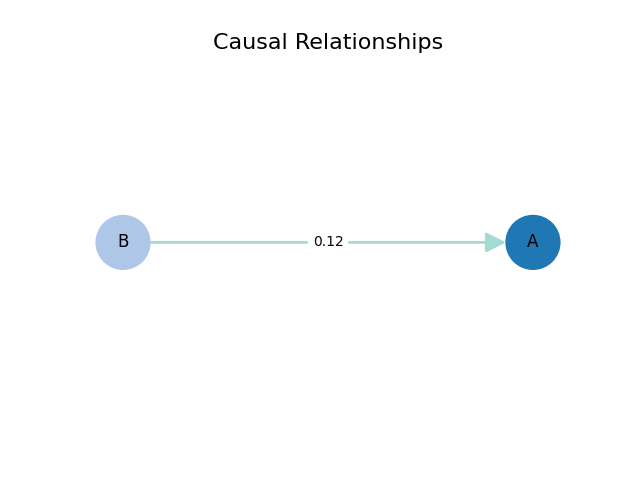

Model score = 1.0


In [15]:
# M0
sensitivity = 10
power = 10
MOD = ['A', 'B']
SEM = [
        # Bimodal logistic - logistic mixture
        'B = logistic(-2,1) if choice([0,1]) else logistic(3,.75)',
        'A = .5 * tanh(B) + logistic(0, 1)'
      ]

gen = gen_data.Gen(sem=SEM, mod=MOD)
ds = gen.getDataset(100000)
ps = ProbSpace(ds)
cg = cdisc.discover(ps=ps, power=power, sensitivity=sensitivity, maxLevel=3, verbosity=2)
cmodel.show(cg=cg, edgeLabels='mde')
print('Model score =', cg.TestModel(order=3, power=power, sensitivity=sensitivity, testDirections=False, verbosity=0)[0])

Pass 1 of 4
    A -- C are independent
Pass 2 of 4
Pass 3 of 4
Pass 4 of 4
Detecting valid links.
  found causal link: A -> B ( 0.4025050013484793 )
  found causal link: C -> B ( 0.3253118321333916 )
Map = 
   A --> B ( 0.224 )
   C --> B ( 0.13 )
Elapsed =  2.0


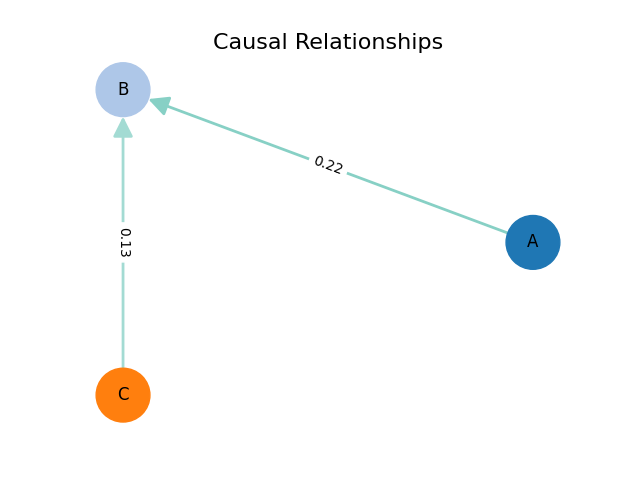

Model score = 1.0


In [2]:
# M1A
sensitivity = 10
power = 10
MOD = ['B', 'A', 'C']
SEM = [
        # Bimodal logistic - logistic mixture
        'A = logistic(-2,1) if choice([0,1]) else logistic(3,.75)',
        'C = truncated("normal(0, 1)", 0, 1)',
        'B = .5 * tanh(A) + 1.25 * log(C+1) + logistic(0, 1)'
      ]

gen = gen_data.Gen(sem=SEM, mod=MOD)
ds = gen.getDataset(100000)
ps = ProbSpace(ds)
cg = cdisc.discover(ps=ps, power=power, sensitivity=sensitivity, maxLevel=3, verbosity=2)
cmodel.show(cg=cg, edgeLabels='mde')
print('Model score =', cg.TestModel(order=3, power=power, sensitivity=sensitivity, testDirections=False, verbosity=0)[0])

Pass 1 of 4
Pass 2 of 4
    A -- C is blocked by ('B',)
Pass 3 of 4
Pass 4 of 4
Detecting valid links.
  found causal link: B -> A ( 0.5848563790535656 )
  found causal link: B -> C ( 0.5485897132433487 )
Map = 
   B --> A ( 0.415 )
   B --> C ( 0.341 )
Elapsed =  2.0


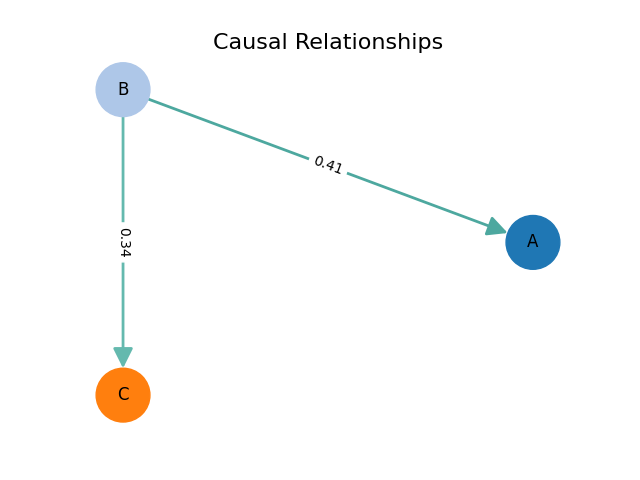

Model score = 1.0


In [7]:
# M1B
sensitivity = 10
power = 10
MOD = ['B', 'A', 'C']
SEM = [
        # Bimodal logistic - logistic mixture
        'B = logistic(-2,1) if choice([0,1]) else logistic(3,.75)',
        'A = tanh(B) + logistic(0, 1)',
        'C = sin(B/2) + logistic(0, 1)'
      ]

gen = gen_data.Gen(sem=SEM, mod=MOD)
ds = gen.getDataset(100000)
ps = ProbSpace(ds)
cg = cdisc.discover(ps=ps, power=power, sensitivity=sensitivity, maxLevel=3, verbosity=2)
cmodel.show(cg=cg, edgeLabels='mde')
print('Model score =', cg.TestModel(order=3, power=power, sensitivity=sensitivity, testDirections=False, verbosity=0)[0])

Pass 1 of 4
Pass 2 of 4
    A -- C is blocked by ('B',)
Pass 3 of 4
Pass 4 of 4
Detecting valid links.
  found causal link: A -> B ( 0.6025691390948252 )
  found causal link: B -> C ( 0.31591419195370835 )
Map = 
   A --> B ( 0.224 )
   B --> C ( 0.287 )
Elapsed =  2.0


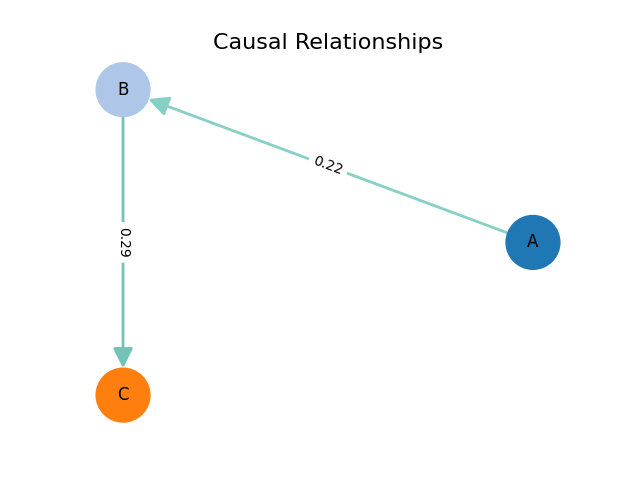

Model score = 1.0


In [8]:
# M1C
sensitivity = 10
power = 10
MOD = ['B', 'A', 'C']
SEM = [
        # Bimodal logistic - logistic mixture
        'A = logistic(-2,1) if choice([0,1]) else logistic(3,.75)',
        'B = tanh(A) / 2 + logistic(0, 1)',
        'C = sin(.5 * B) + logistic(0, 1)'
      ]

gen = gen_data.Gen(sem=SEM, mod=MOD)
ds = gen.getDataset(100000)
ps = ProbSpace(ds)
cg = cdisc.discover(ps=ps, power=power, sensitivity=sensitivity, maxLevel=3, verbosity=2)
cmodel.show(cg=cg, edgeLabels='mde')
print('Model score =', cg.TestModel(order=3, power=power, sensitivity=sensitivity, testDirections=False, verbosity=0)[0])

Pass 1 of 4
Pass 2 of 4
Pass 3 of 4
Pass 4 of 4
Detecting valid links.
  found causal link: B -> A ( 0.6184609808576965 )
  found causal link: B -> C ( 0.6429629292959906 )
  found causal link: A -> C ( 0.4610074626581902 )
Map = 
   A --> C ( 0.544 )
   B --> A ( 0.416 )
   B --> C ( 0.323 )
Elapsed =  3.0


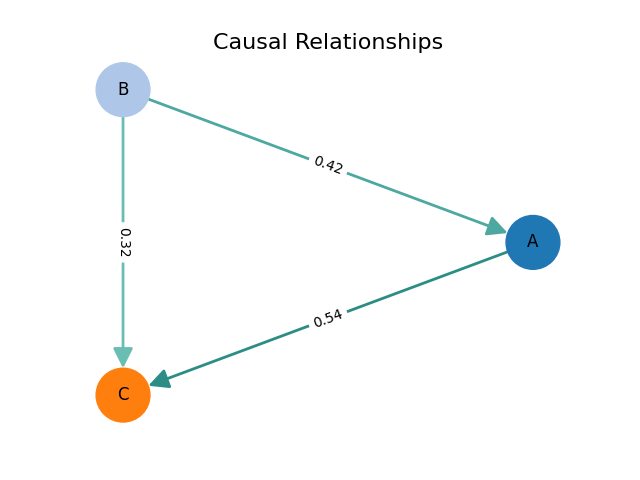

Model score = 1.0


In [2]:
# M2
sensitivity = 10
power = 10
MOD = ['B', 'A', 'C']
SEM = [
        # Bimodal logistic - logistic mixture
        'B = logistic(-2,1) if choice([0,1]) else logistic(3,.75)',
        'A = tanh(B) + logistic(0, 1)',
        'C = .5 * A + sin(.75 * B) + logistic(0,1)'
      ]

gen = gen_data.Gen(sem=SEM, mod=MOD)
ds = gen.getDataset(100000)
ps = ProbSpace(ds)
cg = cdisc.discover(ps=ps, power=power, sensitivity=sensitivity, maxLevel=3, verbosity=2)
cmodel.show(cg=cg, edgeLabels='mde')
print('Model score =', cg.TestModel(order=3, power=power, sensitivity=sensitivity, testDirections=False, verbosity=0)[0])

Pass 1 of 4
Pass 2 of 4
    B -- D is blocked by ('A',)
Pass 3 of 4
    A -- C is blocked by ('B', 'D')
Pass 4 of 4
Detecting valid links.
  found causal link: B -> A ( 0.5709254859525124 )
  found causal link: B -> C ( 0.6537535163885848 )
  found causal link: A -> D ( 0.5874464428067564 )
  found causal link: D -> C ( 0.5068263986144476 )
Map = 
   A --> D ( 0.036 )
   B --> A ( 0.661 )
   B --> C ( 0.42 )
   D --> C ( 0.598 )
Elapsed =  6.0


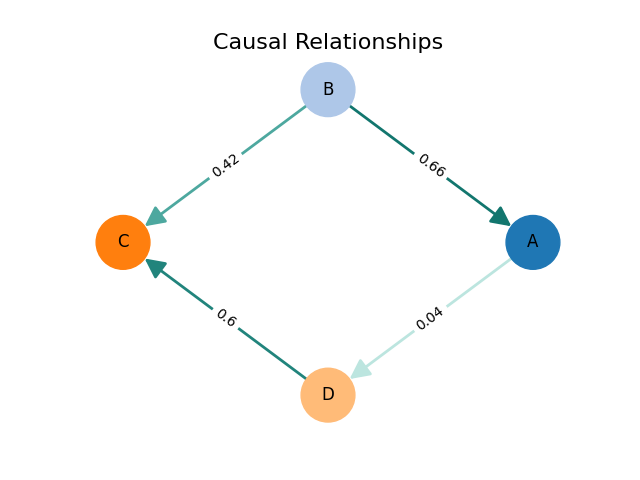

Testing Model for 24 Independencies
Model Testing Completed with 0 error(s) and 0  warning(s).  Confidence =  100.0 %
Model score = 1.0


In [11]:
# M3
sensitivity = 10
power = 10
MOD = ['B', 'A', 'C', 'D']
SEM = [
        # Bimodal logistic - logistic mixture
        'B = logistic(-2,1) if choice([0,1]) else logistic(3,.75)',
        'A = 2 * tanh(B) + logistic(0, 1)',
        'D = .6 * sin(A) + logistic(0, 1)',
        'C = .8 * D + 1.2 * tanh(B) + logistic(0, 1)'
      ]
gen = gen_data.Gen(sem=SEM, mod=MOD)
ds = gen.getDataset(100000)
ps = ProbSpace(ds)
cg = cdisc.discover(ps=ps, power=power, sensitivity=sensitivity, maxLevel=3, verbosity=2)
cmodel.show(cg=cg, edgeLabels='mde')
print('Model score =', cg.TestModel(order=3, power=power, sensitivity=sensitivity, testDirections=False, verbosity=2)[0])

Pass 1 of 4
Pass 2 of 4
    B -- D is blocked by ('A',)
Pass 3 of 4
Pass 4 of 4
Detecting valid links.
  found causal link: B -> C ( 0.6497412189943931 )
  found causal link: B -> A ( 0.6178835005227804 )
  found causal link: D -> C ( 0.3573792775975395 )
  found causal link: A -> C ( 0.4529375197981069 )
  found causal link: A -> D ( 0.5499692055068265 )
Map = 
   A --> C ( 0.329 )
   A --> D ( 0.372 )
   B --> A ( 0.421 )
   B --> C ( 0.521 )
   D --> C ( 0.178 )
Elapsed =  7.0


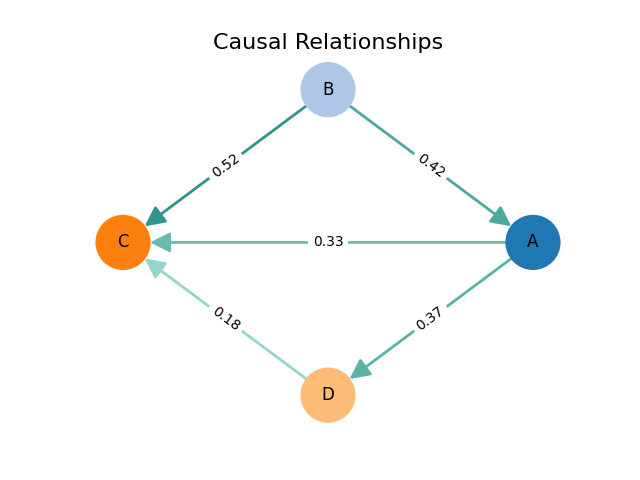

Testing Model for 24 Independencies
Model Testing Completed with 0 error(s) and 0  warning(s).  Confidence =  100.0 %
Model score = 1.0


In [12]:
# M4
sensitivity = 10
power = 5
MOD = ['B', 'C', 'D', 'A']
SEM = [
        # Bimodal logistic - logistic mixture
        'B = logistic(-2,1) if choice([0,1]) else logistic(3,.75)',
        'A = tanh(B) + logistic(0, 1)',
        'D = tanh(1.5* A) + logistic(0, 1)',
        'C = .33 * sin(D) + .33 * B + .33 * tanh(A) + logistic(0, 1)'
      ]
gen = gen_data.Gen(sem=SEM, mod=MOD)
ds = gen.getDataset(100000)
ps = ProbSpace(ds, power=power)
cg = cdisc.discover(ps=ps, power=power, sensitivity=sensitivity, maxLevel=3, verbosity=2)
cmodel.show(cg=cg, edgeLabels='mde')
print('Model score =', cg.TestModel(order=3, power=power, sensitivity=sensitivity, testDirections=False, verbosity=2)[0])

Pass 1 of 4
    independence test:  ('B', 'A', []) = False
    independence test:  ('B', 'C', []) = False
    independence test:  ('B', 'D', []) = False
    independence test:  ('B', 'E', []) = False
    independence test:  ('A', 'C', []) = False
    independence test:  ('A', 'D', []) = False
    independence test:  ('A', 'E', []) = False
    independence test:  ('C', 'D', []) = False
    independence test:  ('C', 'E', []) = False
    independence test:  ('D', 'E', []) = False
Pass 2 of 4
    independence test:  ('B', 'A', ['C']) = False
    independence test:  ('B', 'A', ['D']) = False
    independence test:  ('B', 'A', ['E']) = False
    independence test:  ('B', 'C', ['A']) = False
    independence test:  ('B', 'C', ['D']) = False
    independence test:  ('B', 'C', ['E']) = False
    independence test:  ('B', 'D', ['A']) = True
    independence test:  ('B', 'D', ['C']) = False
    independence test:  ('B', 'D', ['E']) = False
    independence test:  ('B', 'E', ['A']) = False
    ind

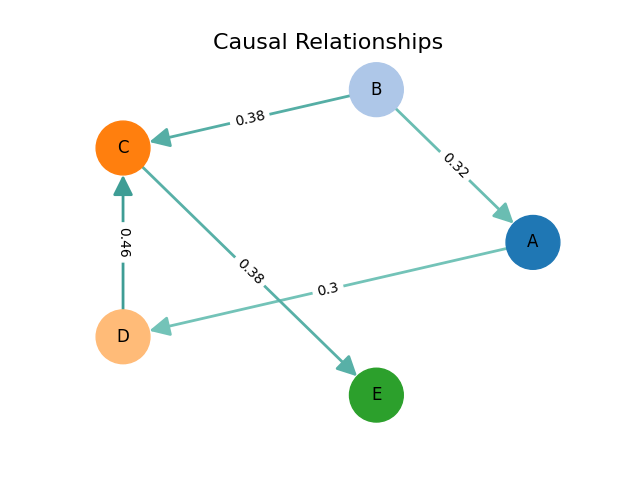

Testing Model for 80 Independencies
Model Testing Completed with 0 error(s) and 0  warning(s).  Confidence =  100.0 %
Model score = 1.0


In [13]:
# M5
sensitivity = 10
power = 10
MOD = ['B', 'A', 'C', 'D', 'E']
SEM = [
        # Bimodal logistic - logistic mixture
        'B = logistic(-2,1) if choice([0,1]) else logistic(3,.75)',
        'A = tanh(B + 2) + logistic(0, 1)',
        'D = tanh(.5 * A) + logistic(0, 1)',
        'C = .5 * D + tanh(B/2) + logistic(0, 1)',
        'E = tanh(C*2) + logistic(0, 1)',
      ]
gen = gen_data.Gen(sem=SEM, mod=MOD)
ds = gen.getDataset(100000)
ps = ProbSpace(ds)
cg = cdisc.discover(ps=ps, power=power, sensitivity=sensitivity, maxLevel=3, verbosity=2)
cmodel.show(cg=cg, edgeLabels='mde')
print('Model score =', cg.TestModel(order=3, power=power, sensitivity=sensitivity, testDirections=False, verbosity=2)[0])

Pass 1 of 4
Pass 2 of 4
    B -- D is blocked by ('A',)
    B -- E is blocked by ('C',)
    A -- E is blocked by ('C',)
    D -- E is blocked by ('C',)
Pass 3 of 4
Pass 4 of 4
Detecting valid links.
  found causal link: B -> A ( 0.6043851596018477 )
  found causal link: B -> C ( 0.6235934334385224 )
  found causal link: A -> C ( 0.5761475978799344 )
  found causal link: A -> D ( 0.3688549834275222 )
  found causal link: D -> C ( 0.49378435740653637 )
  found causal link: C -> E ( 0.5230592081656918 )
Map = 
   A --> C ( 0.612 )
   A --> D ( 0.308 )
   B --> A ( 0.414 )
   B --> C ( 0.484 )
   C --> E ( 0.387 )
   D --> C ( 0.509 )
Elapsed =  13.0


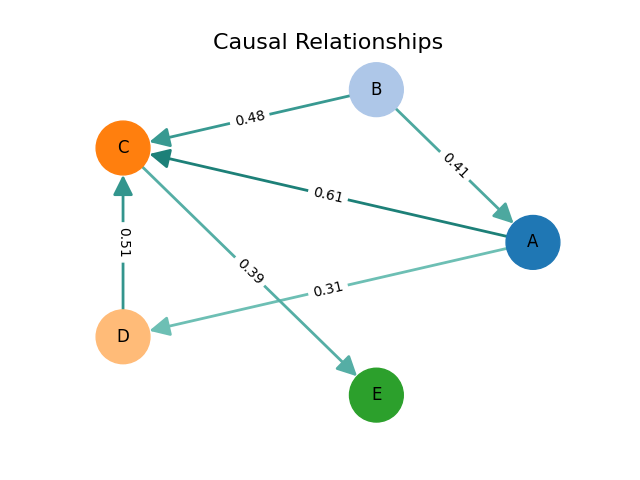

Testing Model for 80 Independencies
Model Testing Completed with 0 error(s) and 0  warning(s).  Confidence =  100.0 %
Model score = 1.0


In [16]:
# M6
sensitivity = 10
power = 10
MOD = ['B', 'A', 'C', 'D', 'E']
SEM = [
        # Bimodal logistic - logistic mixture
        'B = logistic(-2,1) if choice([0,1]) else logistic(3,.75)',
        'A = tanh(B) + logistic(0, 1)',
        'D = tanh(A / 2) + logistic(0, 1)',
        'C = .5 * D + tanh(B/2) + A/2 + logistic(0, 1)',
        'E = tanh(C*2) + logistic(0, 1)',
      ]
gen = gen_data.Gen(sem=SEM, mod=MOD)
ds = gen.getDataset(100000)
ps = ProbSpace(ds)
cg = cdisc.discover(ps=ps, power=power, sensitivity=sensitivity, maxLevel=3, verbosity=2)
cmodel.show(cg=cg, edgeLabels='mde')
print('Model score =', cg.TestModel(order=3, power=power, sensitivity=sensitivity, testDirections=False, verbosity=2)[0])

Pass 1 of 4
    B -- F are independent
    B -- G are independent
    A -- G are independent
    E -- F are independent
    F -- G are independent
Pass 2 of 4
    B -- D is blocked by ('A',)
    B -- E is blocked by ('C',)
    A -- E is blocked by ('C',)
    D -- E is blocked by ('C',)
    D -- F is blocked by ('A',)
    E -- G is blocked by ('C',)
    E -- G is blocked by ('D',)
Pass 3 of 4
    A -- C is blocked by ('B', 'D')
    C -- F is blocked by ('B', 'A')
    C -- F is blocked by ('B', 'D')
    C -- G is blocked by ('B', 'D')
    C -- G is blocked by ('A', 'D')
Pass 4 of 4
Detecting valid links.
  found causal link: B -> A ( 0.61774599220679 )
  found causal link: B -> C ( 0.6022713366767835 )
  found causal link: A -> D ( 0.6535665315506353 )
  found causal link: F -> A ( 0.6734969641338363 )
  found causal link: D -> C ( 0.34552654680617667 )
  found causal link: C -> E ( 0.423432028249962 )
  found causal link: G -> D ( 0.3328653999765705 )
Map = 
   A --> D ( 0.107 )
   B --

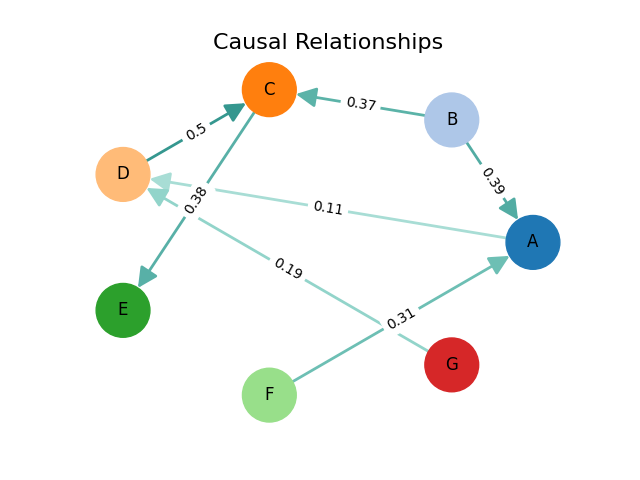

Testing Model for 546 Independencies
Model Testing Completed with 39 error(s) and 1  warning(s).  Confidence =  97.7 %
Model score = 0.9769659624413145


In [17]:
# M7
sensitivity = 10
power = 10
MOD = ['B', 'A', 'C', 'D', 'E', 'F', 'G']
SEM = [
        # Bimodal logistic - logistic mixture
        'B = logistic(-2,1) if choice([0,1]) else logistic(3,.75)',
        # Half-Normal
        'F = truncated("normal(0, 1)", 0, None)',
        # Truncated normal [-1, 1]
        'G = truncated("normal(0, 1)", -1, 1)',
        'A = tanh(B) + F**1.1 + logistic(0, 1)',
        'D = 1.5 * sin(A) + .75 * G + logistic(0, 1)',
        'C = .5 * D + tanh(B/2) + logistic(0, 1)',
        'E = tanh(C*2) + logistic(0, 1)',
      ]
gen = gen_data.Gen(sem=SEM, mod=MOD)
ds = gen.getDataset(100000)
ps = ProbSpace(ds)
cg = cdisc.discover(ps=ps, power=power, sensitivity=sensitivity, maxLevel=3, verbosity=2)
cmodel.show(cg=cg, verbosity=3)
print('Model score =', cg.TestModel(order=3, power=power, sensitivity=sensitivity, testDirections=False, verbosity=2)[0])

Pass 1 of 4
    B -- F are independent
    B -- G are independent
    A -- G are independent
    E -- F are independent
    E -- G are independent
    F -- G are independent
Pass 2 of 4
    B -- D is blocked by ('A',)
    B -- E is blocked by ('C',)
    A -- E is blocked by ('C',)
    D -- E is blocked by ('C',)
    D -- F is blocked by ('A',)
    D -- F is blocked by ('C',)
Pass 3 of 4
    C -- F is blocked by ('B', 'A')
    C -- G is blocked by ('A', 'D')
Pass 4 of 4
Detecting valid links.
  found causal link: B -> A ( 0.6786286229526283 )
  found causal link: B -> C ( 0.6668901043709046 )
  found causal link: A -> C ( 0.5361903326654194 )
  found causal link: A -> D ( 0.44370473231598045 )
  found causal link: F -> A ( 0.6507424407557422 )
  found causal link: D -> C ( 0.3602487734215513 )
  found causal link: C -> E ( 0.6360706984709726 )
  found causal link: G -> D ( 0.20571607846977424 )
Map = 
   A --> C ( 0.718 )
   A --> D ( 0.299 )
   B --> A ( 0.391 )
   B --> C ( 0.506 )
  

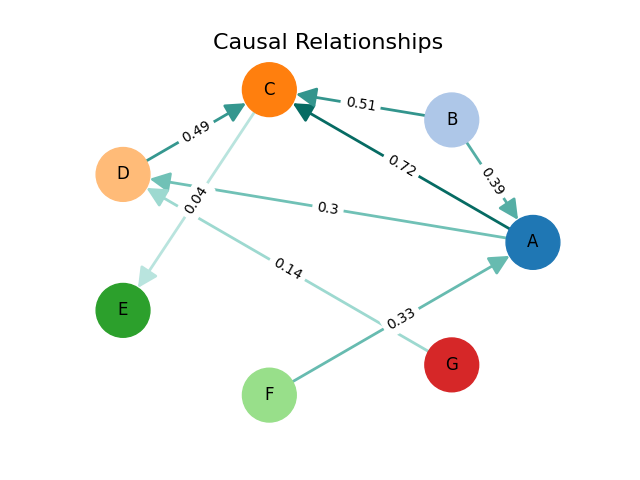

Testing Model for 546 Independencies
Model Testing Completed with 49 error(s) and 2  warning(s).  Confidence =  97.2 %
Model score = 0.9720654627539503


In [18]:
# M8
sensitivity = 10
power = 10
MOD = ['B', 'A', 'C', 'D', 'E', 'F', 'G']
SEM = [
        # Bimodal logistic - logistic mixture
        'B = logistic(-2,1) if choice([0,1]) else logistic(3,.75)',
        # Half-Normal
        'F = truncated("normal(0, 1)", 0, None)',
        # Truncated normal [-1, 1]
        'G = truncated("normal(0, 1)", -1, 1)',
        'A = tanh(B) + F**1.2 + logistic(0, 1)',
        'D = tanh(.5 * A) + log(G + 2) + logistic(0, 1)',
        'C = .5 * D + tanh(2 * B) + .75 * A + logistic(0, 1)',
        'E = sin(C*.75) + logistic(0, 1)',
      ]
gen = gen_data.Gen(sem=SEM, mod=MOD)
ds = gen.getDataset(100000)
ps = ProbSpace(ds)
cg = cdisc.discover(ps=ps, power=power, sensitivity=sensitivity, maxLevel=3, verbosity=2)
cmodel.show(cg=cg, verbosity=3)
print('Model score =', cg.TestModel(order=3, power=power, sensitivity=sensitivity, testDirections=False, verbosity=2)[0])

Pass 1 of 4
    B -- F are independent
    B -- G are independent
    A -- G are independent
    F -- G are independent
Pass 2 of 4
    B -- D is blocked by ('A',)
    D -- E is blocked by ('C',)
    D -- F is blocked by ('A',)
    E -- G is blocked by ('C',)
Pass 3 of 4
    B -- E is blocked by ('C', 'F')
    A -- E is blocked by ('C', 'F')
    C -- F is blocked by ('B', 'A')
    C -- G is blocked by ('A', 'D')
Pass 4 of 4
Detecting valid links.
  found causal link: B -> A ( 0.6435620624100931 )
  found causal link: B -> C ( 0.62275944311991 )
  found causal link: A -> C ( 0.5487303894319855 )
  found causal link: A -> D ( 0.5807261205232982 )
  found causal link: F -> A ( 0.4161868359973165 )
  found causal link: D -> C ( 0.38863134277660516 )
  found causal link: C -> E ( 0.6330109481064422 )
  found causal link: G -> D ( 0.446060581192035 )
  found causal link: F -> E ( 0.6442526666235602 )
Map = 
   A --> C ( 0.541 )
   A --> D ( 0.279 )
   B --> A ( 0.41 )
   B --> C ( 0.401 )
  

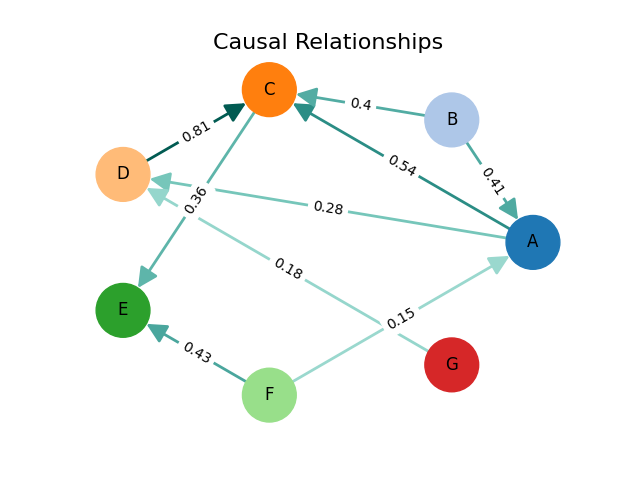

Testing Model for 546 Independencies
Model Testing Completed with 20 error(s) and 1  warning(s).  Confidence =  99.0 %
Model score = 0.9895618556701031


In [29]:
# M9
sensitivity = 10
power = 10
MOD = ['B', 'A', 'C', 'D', 'E', 'F', 'G']
SEM = [
        # Bimodal logistic - logistic mixture
        'B = logistic(-2,1) if choice([0,1]) else logistic(3,.75)',
        # Half-Normal
        'F = truncated("normal(0, 1)", 0, None)',
        # Truncated normal [-1, 1]
        'G = truncated("normal(0, 1)", -1, 1)',
        'A = tanh(B) + log(F + 1) + logistic(0, 1)',
        'D = sin(.5 * A) + .6 * (G+1)**1.1 + logistic(0, 1)',
        'C = 1.5 * D + tanh(.95 * B) + .5 * A + logistic(0, 1)',
        'E = tanh(C * 1.2) + 1.5 * F + logistic(0, 1)',
      ]
gen = gen_data.Gen(sem=SEM, mod=MOD)
ds = gen.getDataset(100000)
ps = ProbSpace(ds)
cg = cdisc.discover(ps=ps, power=power, sensitivity=sensitivity, maxLevel=3, verbosity=2)
cmodel.show(cg=cg, verbosity=3)
print('Model score =', cg.TestModel(order=3, power=power, sensitivity=sensitivity, testDirections=False, verbosity=2)[0])

Pass 1 of 5
    independence test:  ('B', 'A', []) = False
    independence test:  ('B', 'C', []) = False
    independence test:  ('B', 'D', []) = False
    independence test:  ('B', 'E', []) = False
    independence test:  ('B', 'F', []) = True
    independence test:  ('B', 'G', []) = True
    independence test:  ('A', 'C', []) = False
    independence test:  ('A', 'D', []) = False
    independence test:  ('A', 'E', []) = False
    independence test:  ('A', 'F', []) = False
    independence test:  ('A', 'G', []) = False
    independence test:  ('C', 'D', []) = False
    independence test:  ('C', 'E', []) = False
    independence test:  ('C', 'F', []) = False
    independence test:  ('C', 'G', []) = False
    independence test:  ('D', 'E', []) = False
    independence test:  ('D', 'F', []) = False
    independence test:  ('D', 'G', []) = False
    independence test:  ('E', 'F', []) = False
    independence test:  ('E', 'G', []) = False
    independence test:  ('F', 'G', []) = False
   

    independence test:  ('A', 'C', ['B', 'G']) = False
    independence test:  ('A', 'C', ['D', 'E']) = False
    independence test:  ('A', 'C', ['D', 'F']) = False
    independence test:  ('A', 'C', ['D', 'G']) = False
    independence test:  ('A', 'C', ['E', 'F']) = False
    independence test:  ('A', 'C', ['E', 'G']) = False
    independence test:  ('A', 'C', ['F', 'G']) = False
    independence test:  ('A', 'D', ['B', 'C']) = False
    independence test:  ('A', 'D', ['B', 'E']) = False
    independence test:  ('A', 'D', ['B', 'F']) = False
    independence test:  ('A', 'D', ['B', 'G']) = False
    independence test:  ('A', 'D', ['C', 'E']) = False
    independence test:  ('A', 'D', ['C', 'F']) = False
    independence test:  ('A', 'D', ['C', 'G']) = False
    independence test:  ('A', 'D', ['E', 'F']) = False
    independence test:  ('A', 'D', ['E', 'G']) = False
    independence test:  ('A', 'D', ['F', 'G']) = False
    independence test:  ('A', 'E', ['B', 'C']) = False
    indepe

    independence test:  ('C', 'D', ['B', 'A', 'F']) = False
    independence test:  ('C', 'D', ['B', 'A', 'G']) = False
    independence test:  ('C', 'D', ['B', 'F', 'G']) = False
    independence test:  ('C', 'D', ['A', 'F', 'G']) = False
    independence test:  ('C', 'E', []) = False
    independence test:  ('C', 'F', ['B', 'A', 'D']) = True
    independence test:  ('C', 'F', ['B', 'A', 'E']) = False
    independence test:  ('C', 'F', ['B', 'A', 'G']) = True
    independence test:  ('C', 'F', ['B', 'D', 'E']) = False
    independence test:  ('C', 'F', ['B', 'D', 'G']) = False
    independence test:  ('C', 'F', ['B', 'E', 'G']) = False
    independence test:  ('C', 'F', ['A', 'D', 'E']) = False
    independence test:  ('C', 'F', ['A', 'D', 'G']) = False
    independence test:  ('C', 'F', ['A', 'E', 'G']) = False
    independence test:  ('C', 'F', ['D', 'E', 'G']) = False
    independence test:  ('C', 'G', ['B', 'A', 'D']) = False
    independence test:  ('C', 'G', ['B', 'A', 'F']) = F

        testDirection: v1, v2, combo, rho, N =  C D ['B', 'E'] 0.024727941869660184 136
        testDirection: v1, v2, combo, rho, N =  C D ['B', 'G'] 0.08642519706315374 107
        testDirection: v1, v2, combo, rho, N =  C D ['A', 'E'] 0.061821466582839185 143
        testDirection: v1, v2, combo, rho, N =  C D ['A', 'G'] -0.015074362104535326 107
        testDirection: v1, v2, combo, rho, N =  C D ['E', 'G'] 0.05347366512085955 104
      testDirection: best combo for( C , D ) =  ['A'] , ss.N =  3319 , rho =  -0.48725116519702466
  found causal link: D -> C ( 0.48725116519702466 )
        testDirection: v1, v2, combo, rho, N =  C E [] 0.5338014347415273 100000
        testDirection: v1, v2, combo, rho, N =  C E ['B'] 0.3891854017403153 3998
        testDirection: v1, v2, combo, rho, N =  C E ['A'] 0.6070618871389329 3319
        testDirection: v1, v2, combo, rho, N =  C E ['F'] 0.578946113431417 3598
        testDirection: v1, v2, combo, rho, N =  C E ['D'] 0.5463999310771698 3547
  

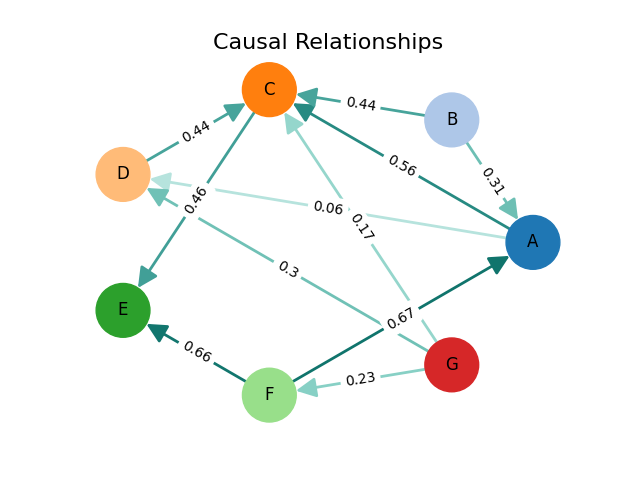

In [3]:
# M10
sensitivity = 10
power = 10
MOD = ['B', 'A', 'C', 'D', 'E', 'F', 'G']
SEM = [
        # Bimodal logistic - logistic mixture
        'B = logistic(-2,1) if choice([0,1]) else logistic(3,.75)',
        # Truncated normal [-1, 1]
        'G = truncated("normal(0, 1)", -1, 1)',
        'F = 1.5 * log(G+2) + logistic(0, 1)',
        'A = tanh(B) + F + logistic(0, 1)',
        'D = sin(A) + 1.1 * G + logistic(0, 1)',
        'C = .5 * D + tanh(1.4 * B) + 1.9 * tanh(A) + logistic(0, 1)',
        'E = tanh(C) + .8 * F + logistic(0, 1)',
      ]
gen = gen_data.Gen(sem=SEM, mod=MOD)
ds = gen.getDataset(100000)
ps = ProbSpace(ds)
cg = cdisc.discover(ps=ps, power=power, sensitivity=sensitivity, maxLevel=4, verbosity=4)
cmodel.show(cg=cg, verbosity=3)
#print('Model score =', cg.TestModel(order=3, power=power, sensitivity=sensitivity, testDirections=False, verbosity=2)[0])

In [16]:
for i in range(10):
    ps.dependCache = {}
    ps.isIndependent('C', 'G', ['B', 'A','D'], sensitivity=10, power=10)

False

Pass 1 of 6
    independence test:  ('B', 'A', []) = False
    independence test:  ('B', 'C', []) = False
    independence test:  ('B', 'D', []) = False
    independence test:  ('B', 'E', []) = True
    independence test:  ('A', 'C', []) = False
    independence test:  ('A', 'D', []) = False
    independence test:  ('A', 'E', []) = False
    independence test:  ('C', 'D', []) = False
    independence test:  ('C', 'E', []) = False
    independence test:  ('D', 'E', []) = False
    B -- E are independent
Pass 2 of 6
    independence test:  ('B', 'A', ['C']) = False
    independence test:  ('B', 'A', ['D']) = False
    independence test:  ('B', 'A', ['E']) = False
    independence test:  ('B', 'C', ['A']) = False
    independence test:  ('B', 'C', ['D']) = False
    independence test:  ('B', 'C', ['E']) = False
    independence test:  ('B', 'D', ['A']) = True
    independence test:  ('B', 'D', ['C']) = False
    independence test:  ('B', 'D', ['E']) = False
    independence test:  ('A', '

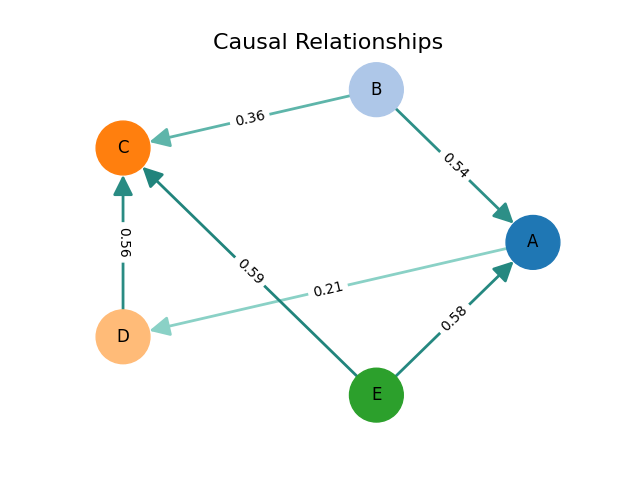

In [20]:
# M11
sensitivity = 10
power = 10
MOD = ['B', 'A', 'C', 'D', 'E']
SEM = [
        # Bimodal logistic - logistic mixture
        'B = logistic(-2,1) if choice([0,1]) else logistic(3,.75)',
        'E = logistic(0,1)',
        'F = logistic(0,1)',
        #'G = logistic(0,1)',
        'A = 2 * tanh(B) + E  + logistic(0, 1)',
        'D = .6 * sin(tanh(A)) + logistic(0, 1)',
        'C = .8 * D + 1.2 * tanh(B) + E + logistic(0, 1)'
      ]
gen = gen_data.Gen(sem=SEM, mod=MOD)
ds = gen.getDataset(100000)
ps = ProbSpace(ds)
cg = cdisc.discover(ps=ps, power=power, sensitivity=sensitivity, maxLevel=5, verbosity=4)
cmodel.show(cg=cg, edgeLabels='mde')
#print('Model score =', cg.TestModel(order=3, power=power, sensitivity=sensitivity, testDirections=False, verbosity=2)[0])

In [19]:
MOD = ['B', 'A', 'C', 'D', 'E']
SEM = [
        # Bimodal logistic - logistic mixture
        'B = logistic(-2,1) if choice([0,1]) else logistic(3,.75)',
        'E = logistic(0,1)',
        'F = logistic(0,1)',
        'G = logistic(0,1)',
        'A = 2 * tanh(B) + E + logistic(0, 1)',
        'D = .6 * sin(tanh(A)) + logistic(0, 1)',
        'C = .8 * D + 1.2 * tanh(B) + E + logistic(0, 1)'
      ]
gen = gen_data.Gen(sem=SEM, mod=MOD)
ds = gen.getDataset(100000)
ps = ProbSpace(ds)
for i in range(3):
    ps.dependCache = {}
    ind = ps.isIndependent('A', 'C', ['B', 'D',  'E'], sensitivity=10, power=10, num_f=300, num_f2=5)
    #ind = ps.isIndependent('B', 'C', ['A', 'E'], sensitivity=10, power=10, num_f=200, num_f2=5)
    print('ind = ', ind)

ind =  True
ind =  True
ind =  True


Pass 1 of 4
    independence test:  ('A', 'C', []) = False
    independence test:  ('A', 'D', []) = False
    independence test:  ('C', 'D', []) = False
Pass 2 of 4
    independence test:  ('A', 'C', ['D']) = False
    independence test:  ('A', 'D', ['C']) = False
    independence test:  ('C', 'D', ['A']) = False
Pass 3 of 4
Pass 4 of 4
Detecting valid links.
AtoB, BtoA =  0.07981488277749624 0.5628583097102191
AtoB, BtoA =  0.45842391324197157 0.16407650914343697
AtoB, BtoA =  0.3059438931698515 0.7261621273274345
AtoB, BtoA =  0.2596763422155911 0.44382998279355557
AtoB, BtoA =  0.2782260426677038 1.1009631691776918
AtoB, BtoA =  0.31322780505180187 0.3885389252512385
AtoB, BtoA =  0.41094329155502846 0.46359412235334624
AtoB, BtoA =  0.09651644508263504 0.28763707332069927
AtoB, BtoA =  0.4514289497987484 0.2246479926795871
AtoB, BtoA =  0.4637206944210233 0.3309339588196815
AtoB, BtoA =  0.1775836435968696 0.3563373513153852
AtoB, BtoA =  0.38886168508276564 0.2565971249216955
AtoB

AtoB, BtoA =  0.3857559087950006 0.40920692054852087
AtoB, BtoA =  0.9442441364999308 0.44839415088684004
AtoB, BtoA =  0.6454806244015494 0.7580019444267816
AtoB, BtoA =  0.38506651660563895 0.33592922993474456
AtoB, BtoA =  0.06361420539663609 0.9213981693476291
AtoB, BtoA =  0.1625982291411875 0.5059138288289895
AtoB, BtoA =  0.7014397587656003 0.555228623843481
AtoB, BtoA =  1.3769011016511508 0.3396676787059647
AtoB, BtoA =  0.2477386550698798 0.7590850772166048
AtoB, BtoA =  0.31899879882941334 0.784186003947166
AtoB, BtoA =  0.11931699244175546 1.2462468309859316
AtoB, BtoA =  1.104107927320473 0.8196613806051403
AtoB, BtoA =  0.19482815300942258 0.1088892093628096
AtoB, BtoA =  0.28129378250074 0.8591235747552846
AtoB, BtoA =  0.1990959780950935 0.22329434783215743
AtoB, BtoA =  0.2904669401395234 0.7403968822975769
AtoB, BtoA =  0.13690395548449077 0.25919305500178824
AtoB, BtoA =  0.2974295258385594 0.6903234284692255
AtoB, BtoA =  1.0969152541706308 0.058144342124951544
AtoB

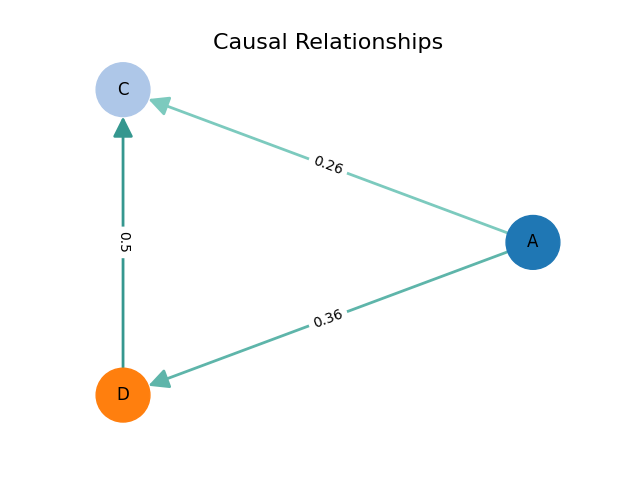

In [6]:
# M3 \B
sensitivity = 10
power = 10
MOD = ['A', 'C', 'D']
SEM = [
        # Bimodal logistic - logistic mixture
        'B = logistic(-2,1) if choice([0,1]) else logistic(3,.75)',
        'A = tanh(B) + logistic(0, 1)',
        'D = tanh(A) + logistic(0, 1)',
        'C = .5 * D + tanh(B)/2 + logistic(0, 1)'
      ]
gen = gen_data.Gen(sem=SEM, mod=MOD)
ds = gen.getDataset(100000)
ps = ProbSpace(ds)
cg = cdisc.discover(ps=ps, power=power, sensitivity=sensitivity, maxLevel=3, verbosity=4)
cmodel.show(cg=cg, edgeLabels='mde')
#print('Model score =', cg.TestModel(order=3, power=power, sensitivity=sensitivity, testDirections=False, verbosity=2)[0])

Pass 1 of 4
    independence test:  ('B', 'A', []) = False
    independence test:  ('B', 'C', []) = False
    independence test:  ('B', 'D', []) = False
    independence test:  ('B', 'E', []) = False
    independence test:  ('B', 'F', []) = True
    independence test:  ('A', 'C', []) = False
    independence test:  ('A', 'D', []) = False
    independence test:  ('A', 'E', []) = False
    independence test:  ('A', 'F', []) = False
    independence test:  ('C', 'D', []) = False
    independence test:  ('C', 'E', []) = False
    independence test:  ('C', 'F', []) = False
    independence test:  ('D', 'E', []) = False
    independence test:  ('D', 'F', []) = False
    independence test:  ('E', 'F', []) = False
    B -- F are independent
Pass 2 of 4
    independence test:  ('B', 'A', ['C']) = False
    independence test:  ('B', 'A', ['D']) = False
    independence test:  ('B', 'A', ['E']) = False
    independence test:  ('B', 'A', ['F']) = False
    independence test:  ('B', 'C', ['A']) = F

    independence test:  ('B', 'A', ['C', 'E', 'F']) = False
    independence test:  ('B', 'C', ['A', 'D', 'F']) = False
    independence test:  ('A', 'C', ['B', 'D', 'F']) = False
    independence test:  ('A', 'D', ['C', 'E', 'F']) = False
    independence test:  ('A', 'F', ['B', 'C', 'D']) = False
    independence test:  ('C', 'D', ['B', 'A', 'F']) = False
    independence test:  ('C', 'F', ['B', 'A', 'D']) = True
    independence test:  ('C', 'F', ['B', 'A', 'E']) = False
    independence test:  ('C', 'F', ['B', 'D', 'E']) = False
    independence test:  ('C', 'F', ['A', 'D', 'E']) = False
    C -- F is blocked by ('B', 'A', 'D')
Detecting valid links.
AtoB, BtoA =  0.5113262507556796 1.4405789632598494
AtoB, BtoA =  0.24161486011337396 2.0650538440460773
AtoB, BtoA =  0.21529226870690232 2.4345652907338176
AtoB, BtoA =  0.5350605793131031 2.800180252631176
AtoB, BtoA =  0.1887109164388491 2.541280272170527
AtoB, BtoA =  0.5805251591045609 2.2440697124545457
AtoB, BtoA =  0.253157028

AtoB, BtoA =  0.8756684973721304 0.6036183595379262
AtoB, BtoA =  1.601211010620136 0.8438244362041079
AtoB, BtoA =  1.1727286011016251 0.8575900128961822
AtoB, BtoA =  1.7956029262140343 1.0100067841089564
AtoB, BtoA =  0.8977170673912603 0.21156125431351352
AtoB, BtoA =  0.4182341295508508 0.693793647971422
AtoB, BtoA =  0.6806348555984306 0.5696962891191611
AtoB, BtoA =  0.1584716875317498 0.25369380529868346
AtoB, BtoA =  0.49316650955764446 0.5689241751857278
AtoB, BtoA =  0.3417920521334406 0.18080637831424384
AtoB, BtoA =  1.0870799140481426 0.32293804938255255
AtoB, BtoA =  1.0095148931667983 0.8971615980051183
AtoB, BtoA =  0.11176596974482622 0.2468249830016524
AtoB, BtoA =  0.8053185913041792 0.21682018123184213
AtoB, BtoA =  1.2834243059645143 0.6254858562310114
AtoB, BtoA =  1.6495837545767607 0.6776990989982242
AtoB, BtoA =  0.8189158349556573 0.17296091055532647
AtoB, BtoA =  0.37063613179020005 0.19293797749207864
AtoB, BtoA =  0.5042041758356801 0.23047151818316827
Ato

AtoB, BtoA =  0.7557696505596346 0.8443633250896012
AtoB, BtoA =  0.2802625449304056 1.1826854599612602
AtoB, BtoA =  0.130405082640001 0.24516737742345318
AtoB, BtoA =  0.6522383923540197 0.6131933923068157
AtoB, BtoA =  0.5286231543241804 0.6965567609424613
AtoB, BtoA =  0.8593739036746266 0.5238431645558157
AtoB, BtoA =  0.43862962161541547 0.918411559936922
AtoB, BtoA =  0.7682520418223789 1.0795882060773545
AtoB, BtoA =  1.2861036390322262 0.7217889817832454
AtoB, BtoA =  0.3681864660348901 0.8955669690403416
AtoB, BtoA =  0.24101012689832277 0.46842322289834254
AtoB, BtoA =  0.5964156428476515 0.4999000920206001
AtoB, BtoA =  0.15907776179884664 0.3761686724133452
AtoB, BtoA =  0.4960558662782037 0.8077717909367429
AtoB, BtoA =  1.1270307894144853 0.3033924336694382
        testDirection: v1, v2, combo, rho, N =  B C ['E', 'D'] 0.0845365921838618 124
AtoB, BtoA =  0.36346202219395324 0.6104310223214473
AtoB, BtoA =  0.41269822793469707 0.44009975778135096
AtoB, BtoA =  0.17312537

AtoB, BtoA =  0.511505750440785 1.0221889526864933
AtoB, BtoA =  1.063096773815227 1.4246416575071637
AtoB, BtoA =  1.1928489776492266 1.6004665300405332
        testDirection: v1, v2, combo, rho, N =  A C ['B'] 0.2498013971090629 3970
AtoB, BtoA =  0.43855753332987657 0.32825127320423403
AtoB, BtoA =  0.38885948780549273 0.3568224836440029
AtoB, BtoA =  0.47831156945029946 0.6906926198380907
AtoB, BtoA =  0.5541949456054698 0.22622858268164697
AtoB, BtoA =  0.5192114545807568 0.4706754036660539
AtoB, BtoA =  0.5185336423740667 0.5074851143549656
AtoB, BtoA =  0.42573220132008416 0.7875356071312005
AtoB, BtoA =  0.6976087692443959 0.19562209774636619
AtoB, BtoA =  0.37865371683192856 0.13263192289964895
AtoB, BtoA =  0.7183150620661506 0.6819979109500354
AtoB, BtoA =  0.552185261701731 0.1991192583018897
AtoB, BtoA =  0.37739926272706803 0.6415122332344468
AtoB, BtoA =  0.6367268384042563 0.36735717960309516
AtoB, BtoA =  1.005480657839646 0.2641221190862894
AtoB, BtoA =  0.20400631768

AtoB, BtoA =  0.32657785672959067 1.0643102293697808
AtoB, BtoA =  0.25116609677228174 0.14434048372641095
AtoB, BtoA =  0.3838495513137335 0.75403676674444
AtoB, BtoA =  0.8936808987070924 0.48028529268416326
AtoB, BtoA =  0.00850683501341492 0.8311990777966475
AtoB, BtoA =  0.38641025852902927 0.7858248628562677
AtoB, BtoA =  0.4108389206900049 0.8132477459966974
AtoB, BtoA =  0.4595294456172817 1.263759072279532
AtoB, BtoA =  0.23390188437135237 0.5858874504026543
AtoB, BtoA =  0.3479675701768494 0.24876252426856763
AtoB, BtoA =  0.6931360799102443 0.6959719266758034
AtoB, BtoA =  0.14872208511281354 0.5080187521254625
AtoB, BtoA =  0.44606830290866384 0.12961117867656696
AtoB, BtoA =  0.01039308123497296 0.2967750732362656
AtoB, BtoA =  0.9493984576087097 0.43874772021643743
AtoB, BtoA =  0.20881921058687955 0.8885577178951344
AtoB, BtoA =  0.14316878919611697 0.43761639747152303
AtoB, BtoA =  0.21037327625314922 0.30553822470735637
        testDirection: v1, v2, combo, rho, N =  A

AtoB, BtoA =  0.8459000390073518 0.8237809811680228
AtoB, BtoA =  0.6107465469336443 0.5077273280105562
AtoB, BtoA =  0.5552582371558603 0.29387656843322857
        testDirection: v1, v2, combo, rho, N =  A D ['C', 'B'] -0.12032518198324535 114
      testDirection: best combo for( A , D ) =  ['F'] , ss.N =  3449 , rho =  0.34113175151630243
  found causal link: A -> D ( 0.34113175151630243 )
AtoB, BtoA =  1.8362963151153084 0.33545288216289554
AtoB, BtoA =  2.533123397617185 0.046711614616526585
AtoB, BtoA =  0.9910316208576998 0.18752764592384227
AtoB, BtoA =  2.16495840302753 0.2797639351061719
AtoB, BtoA =  1.5091383009178416 0.8681225163905499
AtoB, BtoA =  1.4604872441878105 0.841470590430158
AtoB, BtoA =  0.2969260001696693 0.10292041800454073
AtoB, BtoA =  1.5830450387871264 0.6603102725495146
AtoB, BtoA =  0.4138738543331317 0.3835980708497127
AtoB, BtoA =  1.3487832201757455 0.7788679980976518
AtoB, BtoA =  1.6861225888228002 0.3676235825723421
AtoB, BtoA =  0.3642184869602082

AtoB, BtoA =  0.9656852491799094 0.6870813589778948
AtoB, BtoA =  0.3677817575969753 0.8120632275379647
AtoB, BtoA =  0.2769923986871669 0.6941353011667352
        testDirection: v1, v2, combo, rho, N =  A F ['E', 'D'] -0.043505074368257304 124
AtoB, BtoA =  1.594497180045843 0.7568735521797355
AtoB, BtoA =  0.6244731946148383 0.7264053108999033
AtoB, BtoA =  1.3976884261131781 0.641154135906556
AtoB, BtoA =  0.6569305140827569 1.2661931182841788
AtoB, BtoA =  0.4474080776350437 0.8662274703937927
AtoB, BtoA =  0.6206891486374524 0.9875875743637025
AtoB, BtoA =  0.9573256294856097 1.9462356063697277
AtoB, BtoA =  0.8484605734058605 1.3393556795965518
AtoB, BtoA =  0.8734632565811548 1.516140295597883
AtoB, BtoA =  1.6571201616454392 0.35848352637069864
AtoB, BtoA =  1.1480880914803484 0.7671345657906566
AtoB, BtoA =  0.9618564080950759 1.5676473726577982
AtoB, BtoA =  2.1252032986904337 1.4560549498257032
AtoB, BtoA =  0.48114342928283055 1.7401842273633499
AtoB, BtoA =  0.827245399968

AtoB, BtoA =  0.4548274398753684 0.354939455184244
AtoB, BtoA =  0.14658718448229605 0.36791479104211067
AtoB, BtoA =  0.5004269227782042 0.4497860243774937
AtoB, BtoA =  0.22724477398539233 0.4963288458155265
AtoB, BtoA =  0.5178735987061094 1.0051957532565277
AtoB, BtoA =  0.02322058984376267 0.33653918044856423
AtoB, BtoA =  0.9418340672607698 0.0506548711481502
AtoB, BtoA =  0.3094312500696114 0.46132874455822637
AtoB, BtoA =  0.2532089601807249 0.15471227706452234
        testDirection: v1, v2, combo, rho, N =  C D ['F'] 0.06633079837876654 3449
AtoB, BtoA =  0.38324087716513283 0.25672011124451816
AtoB, BtoA =  0.43202590442700234 0.6864695236444958
AtoB, BtoA =  0.6219211280872657 0.4436100022447221
AtoB, BtoA =  0.6771618002956622 0.19142968515349862
AtoB, BtoA =  0.4002844421816328 0.39799533507650847
AtoB, BtoA =  0.4791395916658993 0.195786653194069
AtoB, BtoA =  0.8090620053606247 0.47525709605045924
AtoB, BtoA =  0.7990567998320909 0.32753563009258546
AtoB, BtoA =  1.63530

AtoB, BtoA =  0.6443099462653634 0.9044034689454419
AtoB, BtoA =  0.5746001748957626 0.44154859744796543
AtoB, BtoA =  0.38301246920957094 0.4205215639170109
AtoB, BtoA =  0.40108716932272065 0.5728303546373574
AtoB, BtoA =  0.44296002520621913 0.5217432278278771
AtoB, BtoA =  0.25825772516232837 0.329146174356247
AtoB, BtoA =  0.6257137197460348 0.4290875918610292
AtoB, BtoA =  0.34090132164395615 0.5432177019592128
AtoB, BtoA =  0.3373763638865353 0.4408466317944996
AtoB, BtoA =  0.11738742963071754 0.6961404370690463
AtoB, BtoA =  0.2018618867876924 1.2855952594298103
AtoB, BtoA =  0.628501252522801 0.44333195692342525
AtoB, BtoA =  0.22855130363464052 0.5574557913753745
AtoB, BtoA =  0.39481944900713806 0.4119348099907866
AtoB, BtoA =  0.30180237695010026 0.4694847662553108
AtoB, BtoA =  0.1561169067384457 0.19353292208429348
AtoB, BtoA =  0.7709400477505 0.46539730256461426
AtoB, BtoA =  0.1564743558539301 0.3340225861356253
AtoB, BtoA =  0.610858143434217 0.984920431330762
AtoB, 

AtoB, BtoA =  0.22604293473008932 0.5180760269228338
AtoB, BtoA =  0.7477876779806716 0.25171612996008935
AtoB, BtoA =  0.2568179558902757 0.9452792082856711
AtoB, BtoA =  0.25237506647879454 0.6329764135442864
AtoB, BtoA =  0.22536791393349873 0.4121043849242725
AtoB, BtoA =  0.28151828707070925 0.7108698935822365
AtoB, BtoA =  0.052822371258337844 0.8590962460654087
AtoB, BtoA =  0.2685520757442564 0.2938024491895552
AtoB, BtoA =  0.5948497028876352 0.735675507975317
AtoB, BtoA =  0.16147836286462333 0.5867519429990934
AtoB, BtoA =  0.2508016304945585 0.6441634475225063
AtoB, BtoA =  0.16816078807967125 0.2702464484847131
AtoB, BtoA =  0.29586534364816763 0.21970294103812793
AtoB, BtoA =  0.47824484910982407 0.40682078473150757
AtoB, BtoA =  0.3443582233816556 1.097700342193024
AtoB, BtoA =  0.597079847983622 0.42412671264116775
        testDirection: v1, v2, combo, rho, N =  C E ['B'] 0.2407801115301482 3970
AtoB, BtoA =  1.024472621690011 0.6456132905240763
AtoB, BtoA =  0.69772581

AtoB, BtoA =  0.29363136046243676 1.2507886625224935
AtoB, BtoA =  0.759767865706878 1.3844878637304312
AtoB, BtoA =  0.41496360259064013 0.09070962467474787
        testDirection: v1, v2, combo, rho, N =  C E ['D', 'B'] 0.0639519833878602 138
      testDirection: best combo for( C , E ) =  ['F'] , ss.N =  3449 , rho =  0.27219108092723154
  found causal link: C -> E ( 0.27219108092723154 )
AtoB, BtoA =  0.2987321134873527 0.31905463198847944
AtoB, BtoA =  0.5706929373375025 0.5356612067113999
AtoB, BtoA =  0.49265652917158986 0.32755817545969756
AtoB, BtoA =  0.8732522326952605 0.44848062171983466
AtoB, BtoA =  0.146052834000306 0.5006754914153125
AtoB, BtoA =  0.5438160937784915 1.0066516459189487
AtoB, BtoA =  0.6700567162197016 0.26730919776681517
AtoB, BtoA =  0.28587870413594685 0.10903381222516709
AtoB, BtoA =  1.5030050518024989 0.1288737220634624
AtoB, BtoA =  0.31295231518297323 0.47697170319909815
AtoB, BtoA =  0.7409148534716322 0.18507007434155154
AtoB, BtoA =  0.468773027

AtoB, BtoA =  0.7946134010574358 0.3080302483367672
AtoB, BtoA =  0.3815729725630619 0.2507221689424674
        testDirection: v1, v2, combo, rho, N =  D F ['C', 'A'] 0.0489694041893298 153
      testDirection: best combo for( D , F ) =  ['E', 'A'] , ss.N =  133 , rho =  0.10873867586726801
  found causal link: D -> F ( 0.10873867586726801 )
AtoB, BtoA =  1.684847490006839 0.22987036502104155
AtoB, BtoA =  1.3288047699139423 0.6449560107947075
AtoB, BtoA =  1.7674377234260776 0.25581119680774794
AtoB, BtoA =  1.4237340276692256 0.24793876029854162
AtoB, BtoA =  1.1923001621583513 0.1212801561274268
AtoB, BtoA =  1.0669070988075091 0.6137064815539133
AtoB, BtoA =  0.8323325975879224 0.5380944689914549
AtoB, BtoA =  0.4226604089516332 0.45910641571314464
AtoB, BtoA =  0.7786304225009845 0.48780606448877634
AtoB, BtoA =  1.6526280698878748 0.48269156806718244
AtoB, BtoA =  0.49049718035436574 0.44193348933517007
AtoB, BtoA =  1.2148795606097478 0.4842908076153164
AtoB, BtoA =  0.650803329

AtoB, BtoA =  0.28884509579035667 0.6095687844569488
AtoB, BtoA =  0.20467366195079528 0.8708723671538185
        testDirection: v1, v2, combo, rho, N =  E F ['A', 'D'] 0.1078096493567713 146
      testDirection: best combo for( E , F ) =  ['D'] , ss.N =  3277 , rho =  -0.46845657214715686
  found causal link: F -> E ( 0.46845657214715686 )
Resolving Loops
  loops =  [['A', 'D', 'F']]
  links =  [('B', 'A', 0.6093959034881122), ('B', 'C', 0.6433594245569921), ('A', 'C', 0.5324602817556898), ('A', 'D', 0.34113175151630243), ('F', 'A', 0.46589100345821693), ('D', 'C', 0.478541764505391), ('C', 'E', 0.27219108092723154), ('D', 'F', 0.10873867586726801), ('F', 'E', 0.46845657214715686)]
reversing link =  ('D', 'F', 0.10873867586726801)
  Loops resolved after 1 attempts.
AtoB, BtoA =  0.1401468881253047 1.0452880447897053
AtoB, BtoA =  0.6024066403903869 2.1271775874732124
AtoB, BtoA =  0.3306755299787875 1.856877398098503
AtoB, BtoA =  0.4111016486109193 1.517590165105743
AtoB, BtoA =  0.2

AtoB, BtoA =  0.4116957049590743 0.7843480867622349
AtoB, BtoA =  0.6288156009645333 0.47871684858673635
AtoB, BtoA =  0.45203529274282056 1.010220679541287
AtoB, BtoA =  0.4328117422113028 1.4559537346077722
AtoB, BtoA =  0.28020944533391706 0.6179789399333502
AtoB, BtoA =  0.49407738353211444 0.28849376790266396
AtoB, BtoA =  0.5201663793154242 0.47553007817126713
AtoB, BtoA =  0.09991036061264197 0.3949357857640487
AtoB, BtoA =  0.6969657296337416 0.8654578771468245
AtoB, BtoA =  0.12868458850930806 1.4540533404356575
AtoB, BtoA =  1.385087016103189 0.9406233280026812
AtoB, BtoA =  0.1996062161035313 1.3053692358268636
AtoB, BtoA =  0.40114802251168596 0.5873254230056772
AtoB, BtoA =  0.35043995047181914 0.9049052443681199
AtoB, BtoA =  0.9289647947471035 1.2931772719712105
AtoB, BtoA =  0.08818107420747164 0.6050443229999434
AtoB, BtoA =  0.9958003678885328 1.4131126304978914
AtoB, BtoA =  0.6572435024012 1.586193770806534
AtoB, BtoA =  0.41517133162775316 1.2142297736572294
AtoB, 

AtoB, BtoA =  0.12711840876177044 2.195036445641128
AtoB, BtoA =  0.37078535596429624 1.4766258001264922
AtoB, BtoA =  1.9851915965007099 2.0144052116378877
AtoB, BtoA =  1.272783803454446 1.5158136158400644
AtoB, BtoA =  0.8276303404956928 1.9070827983429697
AtoB, BtoA =  0.36325583440602255 1.7811705305006282
AtoB, BtoA =  0.3463673773136701 2.3588038091692245
AtoB, BtoA =  0.2914321463714842 1.8302465710306954
AtoB, BtoA =  1.0364578523120083 1.956865381197354
AtoB, BtoA =  1.4531887384286735 2.3673071987192458
AtoB, BtoA =  1.234646841482971 2.1570410636210635
AtoB, BtoA =  1.1863865061372498 2.9689853213742
AtoB, BtoA =  0.6273377263837252 1.020330667265835
AtoB, BtoA =  2.0226402204142166 2.4236428429108976
AtoB, BtoA =  1.1667720762603364 2.0486683446665994
AtoB, BtoA =  1.6513949072219756 2.79140216018613
AtoB, BtoA =  1.4593988924206203 1.1752504504744268
AtoB, BtoA =  0.3093822654401811 0.34322685246558093
AtoB, BtoA =  0.1696795657007576 1.387639870477608
AtoB, BtoA =  0.256

AtoB, BtoA =  0.6365251468069616 2.2906488997296597
AtoB, BtoA =  0.5315410720144984 0.7040908430317354
AtoB, BtoA =  0.22250284865771913 0.3589068567009477
AtoB, BtoA =  0.39988002708562104 0.9462095733408011
AtoB, BtoA =  0.1894394952153034 1.247340268624412
AtoB, BtoA =  0.06324071917539496 1.4363464614884436
AtoB, BtoA =  0.7284216179067652 0.9100207398801121
AtoB, BtoA =  0.47595519755855464 0.9166678903081039
AtoB, BtoA =  0.2196928267551727 0.5271459500858516
AtoB, BtoA =  0.30534311353864446 0.6874323056795599
AtoB, BtoA =  0.28328090844139436 1.7920213540653585
AtoB, BtoA =  0.6556341305169777 1.154013545391131
AtoB, BtoA =  0.3989383083609035 0.9088004143317816
AtoB, BtoA =  0.44410538859357357 1.231582940251023
AtoB, BtoA =  1.1700979161705853 0.4683751362272919
AtoB, BtoA =  1.0801842090049332 0.5196538125591219
AtoB, BtoA =  0.5854770503963073 0.6606031368488767
AtoB, BtoA =  0.5912576158509396 0.38449941465896703
AtoB, BtoA =  1.8060070614087103 1.2790701979027232
AtoB, B

AtoB, BtoA =  0.6710745597166452 0.5898012167633404
AtoB, BtoA =  0.32146146865284175 0.3754328651087587
AtoB, BtoA =  0.7845985033763219 0.8166353458394126
AtoB, BtoA =  0.34432510609747 0.6376014545358686
AtoB, BtoA =  0.3234548645979625 0.31342501862052013
AtoB, BtoA =  0.24758810869051223 1.102887459807669
AtoB, BtoA =  0.08414688203082865 1.8068400104991373
AtoB, BtoA =  0.16533930510398903 0.4845114242432947
AtoB, BtoA =  0.1504187378901993 0.08802669563077731
AtoB, BtoA =  0.321636863259215 0.2284737450430675
AtoB, BtoA =  0.31710462132796624 0.6866787552314956
AtoB, BtoA =  0.5721002006606172 0.07900735515979958
AtoB, BtoA =  0.1025382421462201 0.618294537669323
AtoB, BtoA =  0.0767497748910743 0.5991272837148005
AtoB, BtoA =  0.4964610388407435 0.2543799974050703
AtoB, BtoA =  0.9183509476710809 1.3458884372715916
AtoB, BtoA =  0.39699499953619494 1.6055228545230287
AtoB, BtoA =  0.6470110837300647 1.29989861013628
AtoB, BtoA =  0.615450481336225 0.6128405334193536
AtoB, BtoA 

AtoB, BtoA =  0.37334819617621057 1.1605374947333604
AtoB, BtoA =  0.6675266123665506 0.3759655740358665
AtoB, BtoA =  0.951124150172614 0.903158998425505
AtoB, BtoA =  0.5610029366059404 1.0916378227854822
AtoB, BtoA =  0.8352807609402761 0.712274166457532
AtoB, BtoA =  0.5501648037530185 0.8329606846283307
AtoB, BtoA =  0.12545128370983233 1.547516829332459
AtoB, BtoA =  0.39784126651588775 0.9410812723389836
AtoB, BtoA =  0.909029149838491 0.43696519006518403
AtoB, BtoA =  0.42357154310255835 1.3002500896007783
AtoB, BtoA =  0.22917711220321782 1.132458389771184
AtoB, BtoA =  1.2974638742554183 0.29511316778811864
AtoB, BtoA =  0.7030702135491416 1.21691028030464
AtoB, BtoA =  1.0381538262058723 1.1884358142819615
AtoB, BtoA =  0.16988752416451547 0.6527108461277686
AtoB, BtoA =  1.654500305358375 0.6358529605234363
AtoB, BtoA =  0.6974620767031855 0.15220031648952595
AtoB, BtoA =  0.3599190644946923 0.9009985566849141
AtoB, BtoA =  0.23437433416920633 0.37810732687671006
AtoB, BtoA

AtoB, BtoA =  0.6844427911880052 0.39596198399670496
AtoB, BtoA =  0.5328043035808522 0.6327924783679002
AtoB, BtoA =  0.3363092615632775 0.3002820234855775
AtoB, BtoA =  0.23618469895962962 0.24303381154881298
AtoB, BtoA =  0.13034604080464712 0.07927416127021299
AtoB, BtoA =  0.8369100337041018 0.2252855413385518
AtoB, BtoA =  0.43068420303234906 0.07160456596114183
AtoB, BtoA =  0.2382996721711547 0.2573662828105368
AtoB, BtoA =  0.4074291806769298 0.011509210818633871
AtoB, BtoA =  0.38141361448729166 0.27009449084840154
AtoB, BtoA =  0.4969420866893508 0.29944149137499243
AtoB, BtoA =  0.5969017006225801 0.3323745940608633
AtoB, BtoA =  0.3720831795942756 0.3705922532987371
AtoB, BtoA =  0.6158891789350519 0.32821850817154463
AtoB, BtoA =  0.5510114146810152 0.460775040298389
AtoB, BtoA =  0.17322051508138875 0.14130408004441627
AtoB, BtoA =  0.3771448790222404 0.2559715134464272
AtoB, BtoA =  0.40291583145698684 0.27507977116747756
AtoB, BtoA =  1.1237082215506968 0.3099351041553

AtoB, BtoA =  1.3287628640466964 0.6111802068970353
AtoB, BtoA =  0.5447799694650332 0.7602146229484782
AtoB, BtoA =  0.30319616486942436 1.149982995828229
AtoB, BtoA =  0.7209487824633181 0.9108803714176301
AtoB, BtoA =  1.4048174896026175 0.19029845075295673
AtoB, BtoA =  0.23329010795193916 1.0795644298835778
AtoB, BtoA =  1.0810500903633264 0.6336382495760293
AtoB, BtoA =  1.103903890662096 0.6916488318930271
AtoB, BtoA =  1.3116413372871416 0.48174140757071043
AtoB, BtoA =  1.0456653413528403 0.3813463644375503
AtoB, BtoA =  0.6429804470808154 0.7944624682882948
AtoB, BtoA =  0.7050314901134132 0.5306088895438738
AtoB, BtoA =  0.92661409999168 1.2809041382333863
AtoB, BtoA =  0.837939264438298 1.6386601922145774
AtoB, BtoA =  1.31125215501699 0.8331794652271849
AtoB, BtoA =  0.21366227689084805 0.18039351537813453
AtoB, BtoA =  0.4142610898899487 0.3016994632094022
AtoB, BtoA =  0.25041988632440376 0.7344791193665817
AtoB, BtoA =  1.1129767325139055 0.4681539830439498
AtoB, BtoA =

Map = 
   A --> C ( 0.711 )
   A --> D ( 0.464 )
   B --> A ( 0.297 )
   B --> C ( 0.401 )
   C --> E ( 0.534 )
   D --> C ( 0.657 )
   F --> A ( 0.706 )
   F --> D ( 0.468 )
   F --> E ( 0.579 )
Elapsed =  31.0


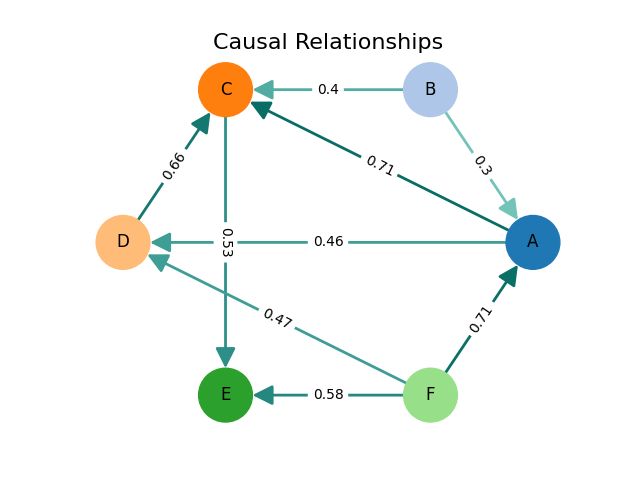

Testing Model for 225 Independencies
Model Testing Completed with 0 error(s) and 0  warning(s).  Confidence =  100.0 %
Model score = 1.0


In [9]:
# M10 \G
sensitivity = 10
power = 10
MOD = ['B', 'A', 'C', 'D', 'E']
SEM = [
        # Bimodal logistic - logistic mixture
        'B = logistic(-2,1) if choice([0,1]) else logistic(3,.75)',
        'G = logistic(0, 1)',
        'F = .5 * G + logistic(0, 1)',
        'A = tanh(B) + F + logistic(0, 1)',
        'D = tanh(A) + G + logistic(0, 1)',
        'C = .5 * D + tanh(B/2) + A/2 + logistic(0, 1)',
        'E = tanh(C*2) + F/2 + logistic(0, 1)',
      ]
gen = gen_data.Gen(sem=SEM, mod=MOD)
ds = gen.getDataset(100000)
ps = ProbSpace(ds)
cg = cdisc.discover(ps=ps, power=power, sensitivity=sensitivity, maxLevel=3, verbosity=4)
cmodel.show(cg=cg, verbosity=3)
print('Model score =', cg.TestModel(order=3, power=power, sensitivity=sensitivity, testDirections=False, verbosity=2)[0])